In [1]:
import numpy as np
import gym
import gym_custom_envs
import random
import time
from matplotlib.pylab import plt
import seaborn as sns
env = gym.make("DoubleIntegrator-v0")

In [2]:
N = [env.dense_parameter]*len(env.observation_space_high)
delta_T = (env.observation_space_high - env.observation_space_low)/N

def getDiscrete(s):
    dis_s = (s - env.observation_space_low)/delta_T
    return tuple(dis_s.astype(np.int))
print(N, delta_T, getDiscrete(np.array([2,2])))


[20, 20] [0.2 0.2] (20, 20)


(21, 21, 2)
(21, 21)


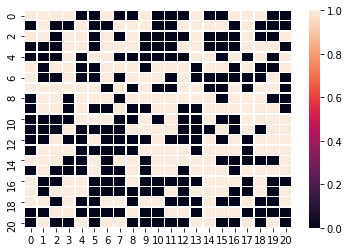

In [3]:
J = np.random.uniform(low=0, high=1, size=[env.dense_parameter+1, env.dense_parameter+1, len(env.observation_space_high)])
# J = np.zeros((env.dense_parameter+1, env.dense_parameter+1, len(env.observation_space_high)))
print(J.shape)
action_map = np.array([[random.choice([0, env.umax]) for i in range(J.shape[0])] for i in range(J.shape[0])])
# action_map = np.ones((J.shape[0], J.shape[0]))
print(action_map.shape)
ax = sns.heatmap(action_map, linewidth=0.5)
plt.show()

In [4]:
from IPython.display import clear_output
episodes = 50000
lr = 0.1
dis = 0.9
for i in range(episodes):
    s = getDiscrete(env.reset())    
    done = False
    print(i)
#     print(s)
    while not done:
        a = action_map[s[0], s[1]]
        ns, cost, done, _ = env.step(a)
        ns = env.get_discrete(ns)
        s = ns
#         if i%500 == 0: 
#             env.render()
        if not done:
            temp_a = np.argmax(J[ns[0], ns[1]])
#             print(temp_a)
            J[ns[0], ns[1], temp_a] += (np.max(dis*J[ns[0], ns[1]]) + cost - J[ns[0], ns[1], temp_a])
#             J[ns[0], ns[1], temp_a] /= np.max(J)
#             if temp_a == 0:
#                 temp_a = -1
            action_map[ns[0], ns[1]] = temp_a     
#             ns1, cost1, done,_ = env.step(env.umin)
#             ns2, cost2, done,_ = env.step(env.umax)
#             J[ns1[0], ns1[1]]
#             ns1 = env.get_discrete(ns1)
#             ns2 = env.get_discrete(ns2)
#             if np.argmin([cost1, cost2]) == 0:
#                 action_map[ns[0], ns[1]] = -1.
#             else:
#                 action_map[ns[0], ns[1]] = 1.
            
#             J[s[0], s[1]] = np.min([cost1, cost2]) + cost
#             done = False
#         print(action_map)
#         print(J)
        clear_output(wait=True)
#         time.sleep(0.05)

#     print(s)
        

49999


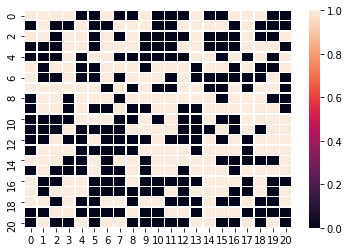

In [5]:
ax = sns.heatmap(action_map, linewidth=0.5)
plt.show()

In [6]:
print(np.max(J))

0.9977138408260168


In [ ]:
for i in range(100):
    s = env.reset()
    done = False
    while not done:
        a = random.choice([1,-1])
        ns, c, done,_ = env.step(a)
        s = ns
        env.render()
        time.sleep(0.05)